# Part II - Exploratory data Analysis on the Ford gobike 2019feb tripdata
## by Moses Ojonuba


## Investigation Overview
My goal is to show the Average trip duration for the categories of gender and user type

## Dataset Overview

This data set includes information about individual rides made in Ford GoBike bike-sharing system covering the greater San Francisco Bay area in february 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly==5.9.0 --quiet
import plotly.express as px
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# load in the dataset into a pandas dataframe
rides_df = pd.read_csv('201902-fordgobike-tripdata.csv')

rides_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#drop Missing values
rides_df.dropna(inplace=True)

#convert to string
rides_df[['start_station_id', 'end_station_id', 'bike_id']] = rides_df[['start_station_id', 'end_station_id', 'bike_id']].astype(str)


rides_df['member_birth_year'] =rides_df['member_birth_year'].astype(int)

#convert to datetime
rides_df[['start_time', 'end_time']] = rides_df[['start_time', 'end_time']].apply(pd.to_datetime)

In [5]:
#create an age column
rides_df['age'] = 2019 - rides_df['member_birth_year']

rides_df.head(3)



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30


In [6]:
high = rides_df["age"] < 101

rides = rides_df[high]

## Visualization 1


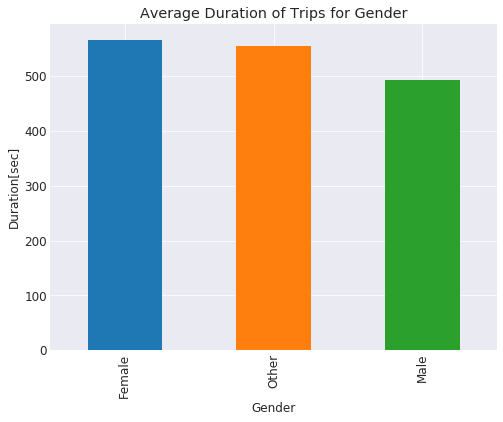

In [7]:
rides.groupby('member_gender')['duration_sec'].median().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Duration[sec]')
plt.title('Average Duration of Trips for Gender');

Female go on longer trips (567 seconds or aproximately 10mins). though the difference is much from the trip duration for males.


## Visualization 2


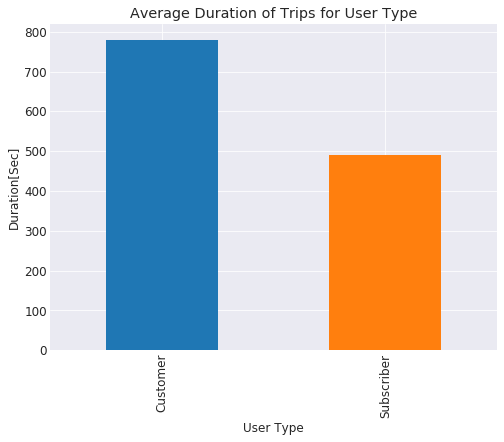

In [8]:
rides.groupby('user_type')['duration_sec'].median().plot(kind='bar')
plt.xlabel('User Type')
plt.ylabel('Duration[Sec]')
plt.title('Average Duration of Trips for User Type');

Customers go on a longer trip (780 sec or 13mins) than Subscribers(490 secs or 9mins).

## Visualization 3



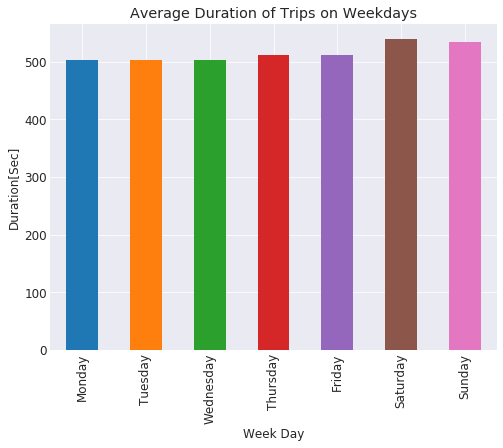

In [15]:
# Add a column for the weekday of the start of the ride
rides_df['ride_start_weekday'] = rides_df['start_time'].dt.day_name()

rides_df['ride_start_weekday'] = pd.Categorical(rides_df['ride_start_weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

rides_df.groupby('ride_start_weekday')['duration_sec'].median().sort_index().plot(kind='bar')
plt.xlabel('Week Day')
plt.ylabel('Duration[Sec]')
plt.title('Average Duration of Trips on Weekdays');

Riders went on longer trips on Weekends (Saturdays and Sundays)

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template --to slides --post serve --no-input --no-prompt